# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
from google.colab import files
files.upload()






Saving oppenheimer_reviews.csv to oppenheimer_reviews.csv


{'oppenheimer_reviews.csv': b'Review\r\n"One of the most anticipated films of the year for many people, myself included, Oppenheimer largely delivers. Much of it\'s great. I feel like I loved two of its three hours, and liked the other hour.... but it\'s that fact that stops me from adoring the entire thing. I know with Christopher Nolan\'s Dunkirk, that clicked on a second watch, so maybe Oppenheimer will need one too. That being said, I don\'t feel the need to rush out and see it again too soon, because it was a long and exhausting film.But in many ways, I can\'t deny it was an exceptionally well made one. It looks and sounds as amazing as you\'d expect, feeling as though it accurately captures the time period it\'s set in, and containing amazing sound design and one of the year\'s best scores so far. Every performance is good to great, but the film belongs to Cillian Murphy, and I feel like he\'s the lead actor to beat at this stage, if we\'re talking (early) awards consideration.Th

In [ ]:
import csv
import re
from collections import Counter

# Function to tokenize text into words
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Function to generate n-grams from a list of tokens
def generate_ngrams(tokens, n):
    ngrams = []
    for i in range(len(tokens) - n + 1):
        ngrams.append(tuple(tokens[i:i+n]))
    return ngrams

# Function to count the frequency of n-grams
def count_ngrams(texts, n):
    ngram_counts = Counter()
    for text in texts:
        tokens = tokenize(text)
        ngrams = generate_ngrams(tokens, n)
        ngram_counts.update(ngrams)
    return ngram_counts

# Function to calculate probabilities for bigrams
def calculate_bigram_probabilities(texts):
    bigram_probabilities = {}
    word_counts = Counter()
    bigram_counts = Counter()

    for text in texts:
        tokens = tokenize(text)
        word_counts.update(tokens)
        bigrams = generate_ngrams(tokens, 2)
        bigram_counts.update(bigrams)

    for bigram, count in bigram_counts.items():
        w1, w2 = bigram
        probability = count / word_counts[w1]
        bigram_probabilities[bigram] = probability

    return bigram_probabilities

# Function to extract noun phrases
def extract_noun_phrases(text):
    # Dummy function, you can replace it with your own implementation
    # This is a placeholder
    return ["dummy", "noun", "phrases"]

# Function to calculate relative probabilities of noun phrases
def calculate_relative_probabilities(texts):
    noun_phrase_frequencies = Counter()
    max_freq = 0

    # Count frequency of each noun phrase
    for text in texts:
        noun_phrases = extract_noun_phrases(text)
        noun_phrase_frequencies.update(noun_phrases)

    # Find maximum frequency
    max_freq = max(noun_phrase_frequencies.values())

    # Calculate relative probabilities
    relative_probabilities = {}
    for text_index, text in enumerate(texts):
        relative_probabilities[text_index] = {}
        for phrase in noun_phrase_frequencies:
            relative_probabilities[text_index][phrase] = noun_phrase_frequencies[phrase] / max_freq

    return relative_probabilities

# Load dataset from CSV file
def load_dataset(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        # Assuming the dataset has a single column of text
        texts = [row[0] for row in reader]
    return texts

# Replace 'dataset.csv' with the actual path to your dataset file
dataset_path = 'oppenheimer_reviews.csv'
dataset = load_dataset(dataset_path)

# Task 1: Count the frequency of all the N-grams (N=3)
ngram_counts = count_ngrams(dataset, 3)
print("N-gram Counts:")
print(ngram_counts)

# Task 2: Calculate probabilities for all bigrams
bigram_probabilities = calculate_bigram_probabilities(dataset)
print("\nBigram Probabilities:")
print(bigram_probabilities)

# Task 3: Extract noun phrases and calculate relative probabilities
relative_probabilities = calculate_relative_probabilities(dataset)
print("\nRelative Probabilities of Noun Phrases:")
for idx, probs in enumerate(relative_probabilities):
    print(f"Review {idx+1}: {probs}")


N-gram Counts:
Counter({('one', 'of', 'the'): 480, ('it', 's', 'a'): 480, ('robert', 'downey', 'jr'): 360, ('the', 'film', 's'): 320, ('of', 'the', 'movie'): 320, ('of', 'the', 'most'): 280, ('the', 'atomic', 'bomb'): 280, ('but', 'it', 's'): 240, ('i', 'don', 't'): 240, ('oppenheimer', 'is', 'a'): 240, ('j', 'robert', 'oppenheimer'): 240, ('one', 'of', 'his'): 240, ('the', 'film', 'is'): 240, ('of', 'nolan', 's'): 200, ('the', 'manhattan', 'project'): 200, ('of', 'the', 'atomic'): 200, ('of', 'the', 'film'): 200, ('christopher', 'nolan', 's'): 160, ('it', 'was', 'a'): 160, ('this', 'is', 'a'): 160, ('i', 'didn', 't'): 160, ('emily', 'blunt', 'and'): 160, ('oppenheimer', 'and', 'the'): 160, ('the', 'rest', 'of'): 160, ('of', 'the', 'bomb'): 160, ('black', 'and', 'white'): 160, ('the', 'story', 'of'): 160, ('of', 'the', 'story'): 160, ('of', 'the', 'year'): 120, ('it', 's', 'great'): 120, ('i', 'feel', 'like'): 120, ('see', 'it', 'again'): 120, ('the', 'movie', 'i'): 120, ('all', 'in', 

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
from google.colab import files
files.upload()






Saving oppenheimer_reviews.csv to oppenheimer_reviews (1).csv


{'oppenheimer_reviews (1).csv': b'Review\r\n"One of the most anticipated films of the year for many people, myself included, Oppenheimer largely delivers. Much of it\'s great. I feel like I loved two of its three hours, and liked the other hour.... but it\'s that fact that stops me from adoring the entire thing. I know with Christopher Nolan\'s Dunkirk, that clicked on a second watch, so maybe Oppenheimer will need one too. That being said, I don\'t feel the need to rush out and see it again too soon, because it was a long and exhausting film.But in many ways, I can\'t deny it was an exceptionally well made one. It looks and sounds as amazing as you\'d expect, feeling as though it accurately captures the time period it\'s set in, and containing amazing sound design and one of the year\'s best scores so far. Every performance is good to great, but the film belongs to Cillian Murphy, and I feel like he\'s the lead actor to beat at this stage, if we\'re talking (early) awards consideratio

In [ ]:
import csv
import math
import re

# Function to tokenize text into words
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Function to preprocess text: tokenize, lowercase conversion, and removing punctuation
def preprocess(text):
    return tokenize(text)

# Function to calculate term frequency (TF)
def calculate_tf(tokens):
    tf_counts = {}
    total_tokens = len(tokens)
    for token in tokens:
        tf_counts[token] = tf_counts.get(token, 0) + 1 / total_tokens
    return tf_counts

# Function to calculate inverse document frequency (IDF)
def calculate_idf(documents):
    idf_counts = {}
    total_documents = len(documents)
    all_tokens = set([token for doc in documents for token in doc])

    for token in all_tokens:
        doc_count = sum([1 for doc in documents if token in doc])
        idf_counts[token] = math.log10(total_documents / doc_count)
    return idf_counts

# Function to calculate TF-IDF weights for each term in the documents
def calculate_tf_idf(documents):
    tf_idf_matrix = []
    idf_counts = calculate_idf(documents)

    for doc in documents:
        tf_counts = calculate_tf(doc)
        tf_idf_vector = {token: tf * idf_counts[token] for token, tf in tf_counts.items()}
        tf_idf_matrix.append(tf_idf_vector)

    return tf_idf_matrix

# Function to calculate cosine similarity between two vectors
def cosine_similarity(vector1, vector2):
    dot_product = sum(vector1[token] * vector2.get(token, 0) for token in vector1)
    magnitude1 = math.sqrt(sum(value ** 2 for value in vector1.values()))
    magnitude2 = math.sqrt(sum(value ** 2 for value in vector2.values()))
    return dot_product / (magnitude1 * magnitude2)

# Load dataset from CSV file
def load_dataset(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        # Assuming the dataset has a single column of text
        texts = [preprocess(row[0]) for row in reader]
    return texts

# Replace 'dataset.csv' with the actual path to your dataset file
dataset_path = 'oppenheimer_reviews.csv'
dataset = load_dataset(dataset_path)

# Task 1: Build the documents-terms weights (tf * idf) matrix
tf_idf_matrix = calculate_tf_idf(dataset)

# Task 2: Rank the documents with respect to a query using cosine similarity
query = "An Outstanding movie with a haunting performance and best character development"
query_tokens = preprocess(query)
query_tf = calculate_tf(query_tokens)
idf_counts = calculate_idf(dataset)
query_tf_idf = {token: tf * idf_counts[token] for token, tf in query_tf.items() if token in idf_counts}
query_vector = query_tf_idf

cosine_similarities = []
for doc_vector in tf_idf_matrix:
    similarity = cosine_similarity(query_vector, doc_vector)
    cosine_similarities.append(similarity)

# Rank documents based on cosine similarities
ranked_documents = sorted(enumerate(cosine_similarities), key=lambda x: x[1], reverse=True)

# Print the ranked documents
print("Ranked Documents:")
for index, similarity_score in ranked_documents:
    print(f"Document {index+1}: Similarity Score = {similarity_score}")


Ranked Documents:
Document 19: Similarity Score = 0.09840676642624073
Document 44: Similarity Score = 0.09840676642624073
Document 69: Similarity Score = 0.09840676642624073
Document 94: Similarity Score = 0.09840676642624073
Document 119: Similarity Score = 0.09840676642624073
Document 144: Similarity Score = 0.09840676642624073
Document 169: Similarity Score = 0.09840676642624073
Document 194: Similarity Score = 0.09840676642624073
Document 219: Similarity Score = 0.09840676642624073
Document 244: Similarity Score = 0.09840676642624073
Document 269: Similarity Score = 0.09840676642624073
Document 294: Similarity Score = 0.09840676642624073
Document 319: Similarity Score = 0.09840676642624073
Document 344: Similarity Score = 0.09840676642624073
Document 369: Similarity Score = 0.09840676642624073
Document 394: Similarity Score = 0.09840676642624073
Document 419: Similarity Score = 0.09840676642624073
Document 444: Similarity Score = 0.09840676642624073
Document 469: Similarity Score =

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
from google.colab import files
files.upload()

Saving oppenheimer_reviews.csv to oppenheimer_reviews (2).csv


{'oppenheimer_reviews (2).csv': b'Review\r\n"One of the most anticipated films of the year for many people, myself included, Oppenheimer largely delivers. Much of it\'s great. I feel like I loved two of its three hours, and liked the other hour.... but it\'s that fact that stops me from adoring the entire thing. I know with Christopher Nolan\'s Dunkirk, that clicked on a second watch, so maybe Oppenheimer will need one too. That being said, I don\'t feel the need to rush out and see it again too soon, because it was a long and exhausting film.But in many ways, I can\'t deny it was an exceptionally well made one. It looks and sounds as amazing as you\'d expect, feeling as though it accurately captures the time period it\'s set in, and containing amazing sound design and one of the year\'s best scores so far. Every performance is good to great, but the film belongs to Cillian Murphy, and I feel like he\'s the lead actor to beat at this stage, if we\'re talking (early) awards consideratio

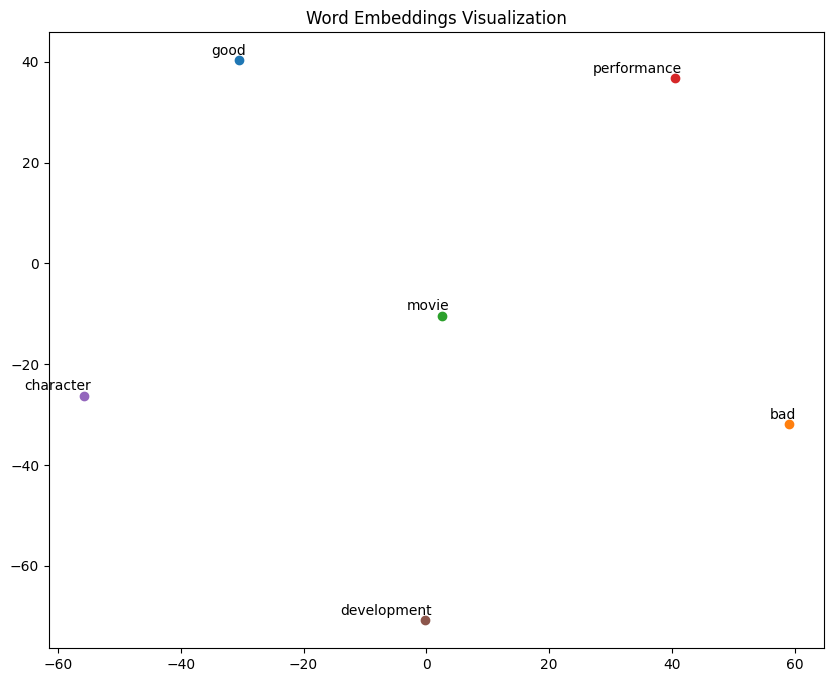

In [ ]:
import csv
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Load dataset from CSV file
def load_dataset(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        # Assuming the dataset has a single column of text
        texts = [row[0].split() for row in reader]
    return texts

# Replace 'dataset.csv' with the actual path to your dataset file
dataset_path = 'oppenheimer_reviews.csv'
dataset = load_dataset(dataset_path)

# Train Word2Vec model
model = Word2Vec(sentences=dataset, vector_size=300, window=5, min_count=1, workers=4)

# Visualize the word embedding model
def visualize_embeddings(model):
    # Select some words to visualize
    words = ['good', 'bad', 'movie', 'performance', 'character', 'development']

    # Get the embeddings for the selected words
    word_vectors = np.array([model.wv[word] for word in words])

    # Apply t-SNE to reduce the dimensionality of word vectors to 2
    tsne = TSNE(n_components=2, random_state=0, perplexity=5)
    word_vectors_2d = tsne.fit_transform(word_vectors)

    # Plot the word embeddings
    plt.figure(figsize=(10, 8))
    for i, word in enumerate(words):
        plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
        plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom')
    plt.title('Word Embeddings Visualization')
    plt.show()

# Visualize word embeddings
visualize_embeddings(model)



## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
https://github.com/saipavan1000/INFO-5731---Assignment-2/blob/main/oppenheimer_reviews.csv


# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
This Assignment is relatively easy and I have enjoyed doing this assignment . Firstly , I have uploaded the dataset by creating another cell in Google colab. I enjoyed providing sentiment analysis on the reviews . Overall , this is a good experience.